## Análise Multivariada

#### Grupo A1: Análise de Agrupamentos
- Eduardo Kaneko
- Victor Toleto
- Yan Cunha

Liguagens: Python ou R

### [1ª Entrega](#1st) 
Data: 22/04/2019 

- Qual a relação esperada entre as variáveis? <br>
- Você acrescentaria quais variáveis na análise? <br>
- Explique como os resultados podem ser utilizados na prática <br> 

### [2ª Entrega](#2nd) 
Data: 28/05/2019 (<font color="#ff0000"> Estamos aqui! </font>)</p>  
- Quais são os resultados esperados? <br>
- Como funciona o processo de agrupamentos? <br>

In [2]:
# Importando as bibliotecas e abrindo o arquivo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('a1_contabil.csv', sep=';')

#### Renomeando as colunas e padronizando o dados

In [4]:
df['rentabilidade'] = df['Rentabilidade (%do PL)'].apply(lambda x: float(x.replace(",", ".")))
df['liquidez'] = df['Liquidezgeral'].apply(lambda x: float(x.replace(",", ".")))
df['endividamento'] = df['Endividamentogeral'].apply(lambda x: float(x.replace(",", ".")))
df['empresa'] = df['Empresa']
df = df[['empresa', 'rentabilidade', 'liquidez', 'endividamento']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
empresa          50 non-null object
rentabilidade    50 non-null float64
liquidez         50 non-null float64
endividamento    50 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB


In [19]:
df.head()

,empresa,rentabilidade,liquidez,endividamento
0,PETROBRAS,21.9,1.0756,52.5
1,PETROBRAS DISTRIBUIDORA,10.5,1.2175,54.2
2,TELEMAR,7.8,0.4218,56.0
3,TELEFONICA,14.1,0.6093,38.1
4,CBB/AMBEV,10.6,0.6162,66.1


## <a id="1st" class="anchor"><font color ="#008000">1ª Entrega</font></a>
______

#### 1. Qual a relação esperada entre as variáveis?

Em primeiro lugar, vale ressltar a importância de investigar as relações entre variáveis quantitativas:
- Verificar se os valores sestão associados. (Os valores de uma medida tendem a crescer (ou decrescer) à medida que a outra cresce?)
- Predizer o valor de uma variável a partir de um valor conhecido da outra.
- Descrever a relação entre variáveis. (Dado um aumento específico numa variável, qual o crescimento médio esperado para a segunda variável?)

O primeiro estágio em qualquer um dos casos é produzir um gráfico de pontos dos dados para obter alguma idéia da forma e grau de associação entre duas variáveis, como o gráfico abaixo.

A análise fundamentalista é a principal ferramenta para entender e estudar os fundamentos econômico-financeiros de uma empresa e, portanto, quando se trata de estudar a relação entre indicadores econônomicos, faz-se necessário utiliza-lá. Dado que, em uma análise com um conjunto de dados parecido com o que estamos tratando aqui, o objetivo seria analisar e levantar as empresas mais saudáveis desta amostra. <br>

Portanto, é de se esperar que haja uma relação forte e positiva entre a variável `vendas` e `rentabilidade`, e uma relação negativa e com força moderada a forte entre as variáveis `liquidez` e `endividamento`.

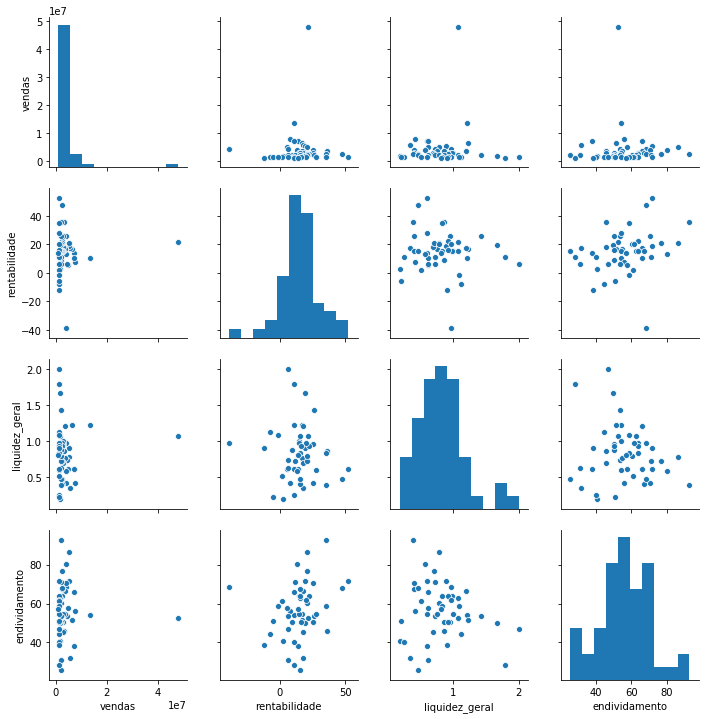

In [27]:
sns.pairplot(df1);

#### 2. Você acrescentaria quais variáveis na análise?

Dado o modo como as 3 variáveis são calculadas, é possível acrescentar as variáveis **lucro** e **patrimônio**, para entender o quão saudável a empresa é. <br> <br>
Os `índices de liquidez`, por exemplo,  avaliam a capacidade de pagamento da empresa frente a suas obrigações. Sendo de grande importância para a administração da continuidade da empresa, as variações destes índices devem ser motivos de estudos para os gestores. <br><br>
Já a `rentabilidade do Patrimônio Líquido` mostra percentual de Lucro Líquido ou Prejuízo Líquido auferido relacionado ao montante total aplicado pelos acionistas. Quanto maior a porcentagem positiva, melhor. <br><br>
O `Índice de Endividamento Geral`, também conhecido como Índice de Endividamento Total, é um índice financeiro usado para entender até que ponto os ativos de uma empresa estão financiados com capital de terceiros. Ou seja, quais geraram dívidas que devem ser quitadas no futuro.

#### 3. Explique como os resultados podem ser utilizados na prática?

Pode-se utilizar os resultados para, por exemplo, definir um preço justo para as ações das empresas analisadas. Isso representa uma grande vantagem, uma vez que os preços das ações muitas vezes são negociados por valores muito diferentes dos fundamentos das empresas, podendo estar:

- Sobrevalorizando: indica que você deve vender as ações
- Subvalorizando: indicando que você deve comprar as ações


Além disso, é de se esperar utilizar os resultados como ferramenta de comparação entre empresas concorrentes ou de um mesmo setor, ajudando a definir qual vale mais a pena investir. Sejam elas grandes empresas, ou até mesmo empresas **small caps**, esta abordagem permite realizar uma comparação lado a lado.

## <a id="2nd" class="anchor"><font color ="#ff0000">2ª Entrega</font></a>
______


#### 1. Quais são os resultados esperados? 
Quando nos referimos a não supervisionado, como é o caso de análise de agrupamento, estamos nos referindo ao fato de que não temos Labels em nosso conjunto de dados, isso quer dizer que, por examplo, um algoritmo não ira aprender com base em exemplos passados, mas sim extrair um padrão do conjunto de dados que temos. A ideia e, portanto, os resultados esperados, é agrupar os dados em grupos semelhantes entre si de modo a poder tirar alguma informação relevante disso.

Geralmente usamos isso como uma etapa para etiquetar os dados para um algoritmo de aprendizado supervisionado e claro achar ruídos em nosso Dataset. O **K-means**, que vimos na última aula de **multivariada**, é um algoritmo muito interessante para essa tarefa pois além de ser fácil é extremamente eficiente e ainda por cima relativamente rápido para tarefa que se propõe.

#### Como funciona o processo de agrupamentos?
A estratégia consiste em criar K centroides em localizações aleatórias, calcular as distancia desses centroides em relação as instâncias mais próximas e classificá-las como pertencente ao cluster que tem como centro o centroide mais próximo, feito isso movemos os centro para a localização média do espaço e refazemos o processo. Isto geralmente é feito ate um limite pré estabelecido.

O dataset que o grupo escolheu tem quatro variáveis: `empresa`, `rentabilidade`, `liquidez` e `endividamento`. Fizemos um dendograma na linguagem python, utilizando a variável liquidez para exemplificar como uma análise de agrupamentos funciona na prática.

#### Dendograma com a variável `liquidez`

In [8]:
from scipy.cluster import hierarchy
df_arr = np.asarray(df[['liquidez']])

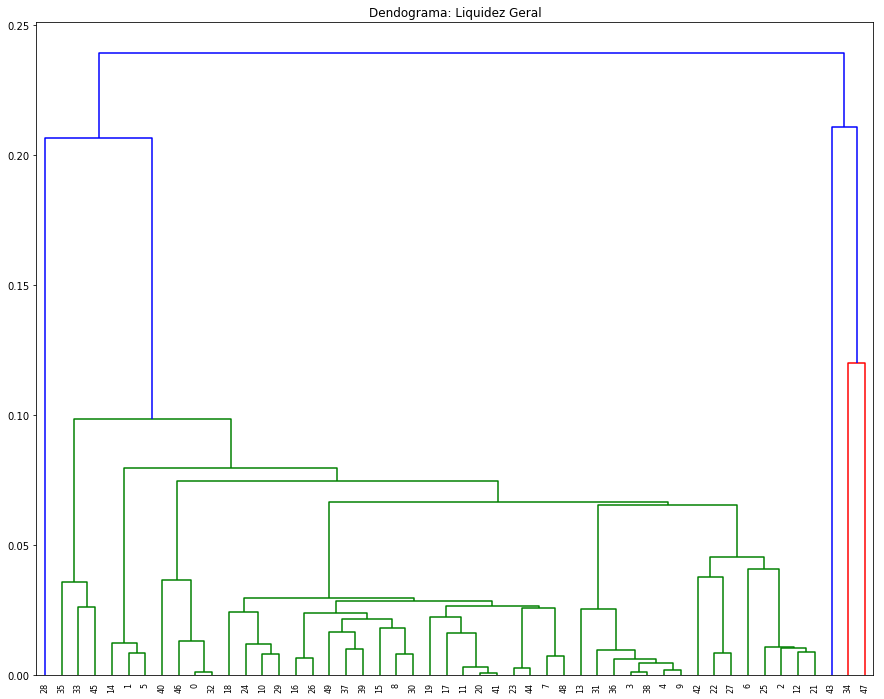

In [18]:
ytdist = np.array(df[['liquidez']])
Z = hierarchy.linkage(ytdist, 'single')
plt.figure(figsize=(15, 12))
plt.title("Dendograma: Liquidez Geral")
dn = hierarchy.dendrogram(Z)